<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Бизнес-задача" data-toc-modified-id="Бизнес-задача-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Бизнес задача</a></span></li><li><span><a href="#Описание-файла-с-данными" data-toc-modified-id="Описание-файла-с-данными-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание файла с данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузить-фаил-с-данными" data-toc-modified-id="Загрузить-фаил-с-данными-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузить фаил с данными</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Перевод-данных-из-json-формата" data-toc-modified-id="Перевод-данных-из-json-формата-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Перевод данных из json формата</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Столбец-revenue" data-toc-modified-id="Столбец-revenue-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Столбец <code>revenue</code></a></span></li></ul></li><li><span><a href="#Бизнесс-задача" data-toc-modified-id="Бизнесс-задача-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Бизнесс задача</a></span><ul class="toc-item"><li><span><a href="#отобразить-суммарные-доходы-по-городам,-версиям-ОС" data-toc-modified-id="отобразить-суммарные-доходы-по-городам,-версиям-ОС-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>отобразить суммарные доходы по городам, версиям ОС</a></span></li><li><span><a href="#Построить-распределение-средних-eCPM-ов-юзеров" data-toc-modified-id="Построить-распределение-средних-eCPM-ов-юзеров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построить распределение средних eCPM-ов юзеров</a></span></li><li><span><a href="#Отобразить-средние-eCPM-ы-по-городам,-версиям-ОС" data-toc-modified-id="Отобразить-средние-eCPM-ы-по-городам,-версиям-ОС-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Отобразить средние eCPM-ы по городам, версиям ОС</a></span></li><li><span><a href="#Зависит-ли-eCPM-от-времени-дня" data-toc-modified-id="Зависит-ли-eCPM-от-времени-дня-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Зависит ли eCPM от времени дня</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Постановка задачи ##

### Общая информация

Мобильная игра зарабатывает на показе рекламы. Есть несколько форматов:
- int – полноэкранная реклама; 
- banner – горизонтальный баннер, висит внизу
экрана пока юзер играет; 
- rv – видео, которое юзер смотрит по желанию и за
просмотр получает монетки или др. ресурсы. <br> Информация о каждом показе
отправляется в аналитику и содержит доход от показа, формат показанной
рекламы, рекламную сеть от которой был показ и др.
eCPM – доход за 1000 показов рекламы.

### Бизнес задача

Провести исследование показов рекламы с целью понять на сколько
отличается eCPM в зависимости от географии (города) юзера, версии ОС и
других параметров. Интересны любые инсайты и находки по eCPM-ам.

### Описание файла с данными

* `profile_id` – id юзера
* `event_json` содержит данные о событии показа рекламы:
* `ad_type` – формат рекламы (int, banner или rv)
* `placement` – когда/где был показ рекламы в игре
* `view_index` – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
* `revenue` – доход от конкретного показа рекламы (eCPM = revenue * 1000)
* `ads_ltv` – накапливающийся доход от рекламы, равен сумме всех revenue юзера
* `network_name` – рекламная сеть, от которой был показ <br>
Остальные столбцы должны быть интуитивно понятны

## Предобработка данных

In [1]:
# загрузка библиотек
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

# отключение предупреждений
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.2f}".format)

### Загрузить фаил с данными

In [2]:
# путь на локальной машине. Не удалось из-за размеров напрямую вытянуть датасет с облака
path = 'datasets/us events ad_revenue filtered 03.02-07.02.csv'
data = pd.read_csv(path, parse_dates=['event_datetime', 'event_timestamp', 'event_receive_datetime', 'event_receive_timestamp'])

In [3]:
data.sample(5)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
654339,JLtBjZtPK0V,11,Samsung,Galaxy Note10,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 09:56:13,1644044173,2022-02-05 09:56:45,1644044205,wifi,Family Mobile,US,NaN
83078,JLrjKw7J4Mp,12,Google,Pixel 3a,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 11:43:13,1644050593,2022-02-05 11:44:00,1644050640,wifi,Google Fi,US,NaN
335118,JLyyHaX75KR,12,Samsung,SM-G996U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 04:39:12,1644111552,2022-02-06 04:39:15,1644111555,wifi,Verizon,US,NaN
297939,JL49WTG4cqE,12,Samsung,Galaxy S20 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 03:09:41,1644019781,2022-02-05 03:09:43,1644019783,wifi,U.S. Cellular,US,NaN
417470,JLxAQMbo714,9,Samsung,Galaxy S8,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 22:15:48,1644174948,2022-02-06 22:16:19,1644174979,wifi,CC Network,US,Charlotte


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   profile_id               860065 non-null  object        
 1   os_version               860079 non-null  object        
 2   device_manufacturer      860079 non-null  object        
 3   device_model             860079 non-null  object        
 4   device_type              860079 non-null  object        
 5   device_locale            860079 non-null  object        
 6   event_name               860079 non-null  object        
 7   event_json               860079 non-null  object        
 8   event_datetime           860079 non-null  datetime64[ns]
 9   event_timestamp          860079 non-null  object        
 10  event_receive_datetime   860079 non-null  datetime64[ns]
 11  event_receive_timestamp  860079 non-null  object        
 12  connection_type 

In [5]:
# исследование датасета
for _ in ['event_datetime', 
          'profile_id', 
          'os_version', 
          'device_manufacturer', 
          'device_type', 
          'device_locale', 
          'country_iso_code', 
          'city']:
    display(_)
    display(data[_].describe())

'event_datetime'

count                  860079
unique                 322812
top       2022-02-06 19:00:31
freq                      555
first     2022-01-29 17:42:32
last      2022-02-07 23:59:59
Name: event_datetime, dtype: object

'profile_id'

count          860065
unique           4226
top       JL5pmKYe8g7
freq             8486
Name: profile_id, dtype: object

'os_version'

count     860079
unique        11
top           12
freq      407587
Name: os_version, dtype: object

'device_manufacturer'

count      860079
unique         34
top       Samsung
freq       651633
Name: device_manufacturer, dtype: object

'device_type'

count     860079
unique         2
top        phone
freq      835667
Name: device_type, dtype: object

'device_locale'

count     860079
unique         9
top        en_US
freq      856257
Name: device_locale, dtype: object

'country_iso_code'

count     860079
unique         1
top           US
freq      860079
Name: country_iso_code, dtype: object

'city'

count       536371
unique         920
top       New York
freq         17584
Name: city, dtype: object

### Проверка на дубликаты

In [6]:
data.duplicated().sum()

0

Явных дубликатов нет.

### Перевод данных из json формата

In [7]:
# извлечем из столбца `event_json` необходимые данные. В случае необходимости можем добавить новые значения
for _ in ['ad_type', 'placement', 'view_index', 'revenue', 'ads_ltv', 'network_name']:
    data[_] = data['event_json'].map(lambda x: json.loads(x)[_])
data

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,...,connection_type,operator_name,country_iso_code,city,ad_type,placement,view_index,revenue,ads_ltv,network_name
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,...,wifi,NaN,US,Norwalk,banner,,1,0.00,0.49,Google AdMob
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,...,wifi,NaN,US,Norwalk,banner,,1,0.00,0.49,Google AdMob
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,...,wifi,Verizon,US,Charlotte,banner,,1,0.00,0.68,APPLOVIN_EXCHANGE
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,...,wifi,T-Mobile,US,Cocoa,int,next_level,1,0.01,0.01,AppLovin
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,...,cell,Verizon,US,NaN,banner,,1,0.01,0.06,Google AdMob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 08:29:27,1643866167,...,wifi,Verizon,US,Elmira,banner,,1,0.00,1.01,APPLOVIN_EXCHANGE
860075,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:12:51,1643843571,...,cell,Verizon,US,Cherry Hill,banner,,1,0.01,0.28,Google AdMob
860076,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:06,1643843586,...,cell,Verizon,US,Cherry Hill,banner,,1,0.00,0.28,Google AdMob
860077,JLKWwju79CA,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-03 02:13:17,1643843597,...,cell,Verizon,US,Cherry Hill,banner,,1,0.00,0.28,Google AdMob


## Анализ данных

### Столбец `revenue`

,view_index,revenue,ads_ltv
count,860079.00,860079.00,860079.00
mean,2.05,0.00,1.42
std,9.68,0.02,2.12
min,1.00,0.00,0.00
25%,1.00,0.00,0.27
50%,1.00,0.00,0.68
75%,1.00,0.00,1.60
max,417.00,0.94,26.70


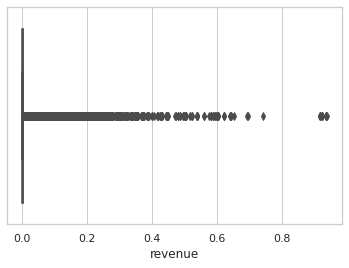

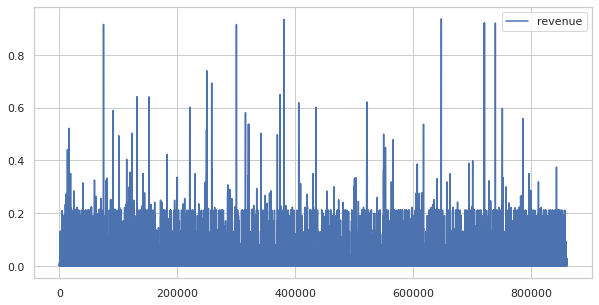

In [8]:
display(data.describe())

sns.set_theme(style="whitegrid")
sns.boxplot(data['revenue'])
plt.show()

data.plot(y='revenue', figsize=(10, 5))
plt.show()

In [9]:
data['revenue'].quantile(0.99)

0.05848

У 99% пользователей выручка находится меньше указанного выше числа. Примем его за порог отсечения. Все что больше будем считать выбросом при расчете средних значений.

## Бизнесс задача

### отобразить суммарные доходы по городам, версиям ОС

Начнем с сумарных доходов, так как в последствии для расчета средних будем отсекать выбросы

In [10]:
data_rev_city=data.groupby('city')['revenue'].sum().sort_values(ascending = False).reset_index()
display(data_rev_city.head(10))

,city,revenue
0,New York,47.45
1,Indianapolis,36.68
2,Houston,34.55
3,Minneapolis,34.24
4,Cleveland,32.48
5,Charlotte,25.62
6,Columbus,22.16
7,Los Angeles,19.74
8,Spokane,18.92
9,Dallas,18.75


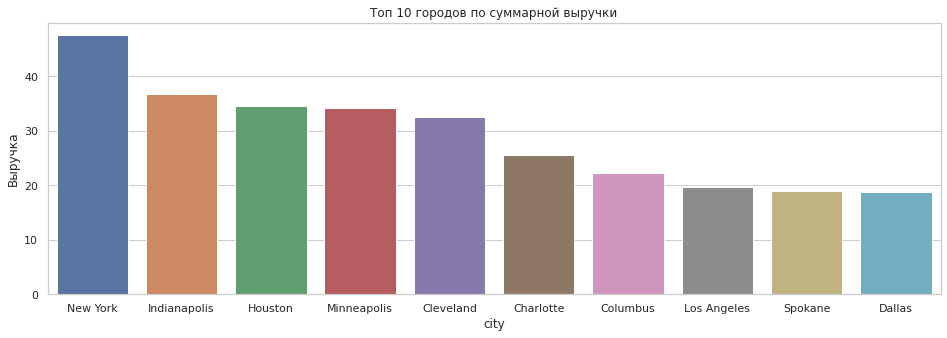

In [11]:
plt.figure(figsize=(16, 5))
plt.title('Топ 10 городов по суммарной выручки')
sns.barplot(data = data_rev_city.head(10), x='city', y='revenue').set_ylabel('Выручка')
plt.show()

In [12]:
data_rev_os=data.groupby('os_version')['revenue'].sum().sort_values(ascending = False).reset_index()
data_rev_os

,os_version,revenue
0,12,1305.58
1,11,587.22
2,10,328.27
3,9,133.11
4,8.0.0,11.89
5,7.0,10.95
6,8.1.0,9.79
7,7.1.1,1.62
8,7.1.2,1.09
9,6.0.1,0.78


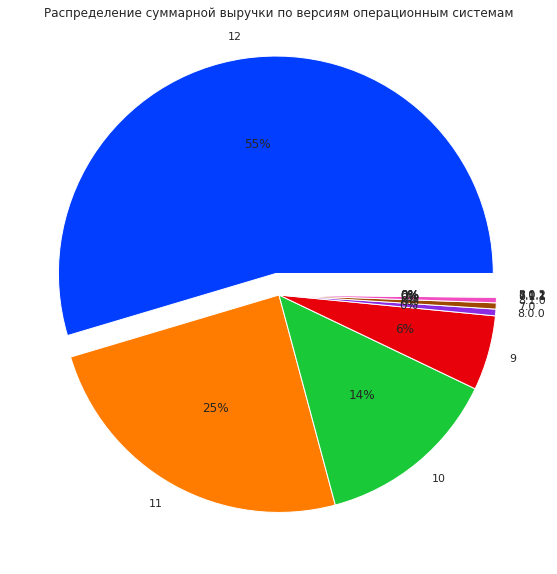

In [13]:
# посторим пирог
plt.figure(figsize=(10, 10))
labels = data_rev_os['os_version']
colors = sns.color_palette('bright')
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(data_rev_os['revenue'], 
        labels=labels,
        colors = colors, 
        autopct = '%0.0f%%', 
        explode = explode)
plt.title('Распределение суммарной выручки по версиям операционным системам')
plt.show()

### Построить распределение средних eCPM-ов юзеров

In [14]:
# Для расчета среднего значения убирем выбросы
data=data.loc[data['revenue'] < data['revenue'].quantile(0.99)]

In [15]:
data['eCPM'] = data['revenue']*1000
user_ecpm=data.groupby('profile_id').agg({'eCPM':'mean', 'ads_ltv': 'max' }).sort_values(by='eCPM', ascending = False).reset_index()
user_ecpm

,profile_id,eCPM,ads_ltv
0,JLtRRNx2ANZ,58.46,0.14
1,JLquHKGepA6,58.43,0.19
2,JL57SduSviq,57.84,0.06
3,JMAortD4wrJ,57.51,0.06
4,JMAEMC8AeG0,56.89,0.25
...,...,...,...
3962,JMGgSSx40E1,0.08,0.00
3963,JLrXfsw1r8g,0.08,0.06
3964,JLyiKRAd5r3,0.06,0.00
3965,JMDtgimxrhR,0.05,0.00


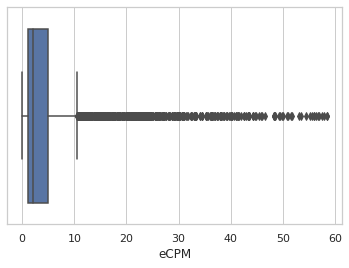

In [16]:
sns.boxplot(user_ecpm['eCPM'])
plt.show()

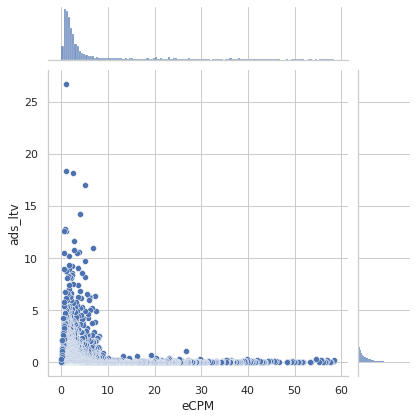

In [17]:
sns.jointplot(x="eCPM", y="ads_ltv", data=user_ecpm)
plt.show()

**Вывод** Важный показатель `ads_ltv` он показывает сколько заработал юзер и из графика выше, можно увидеть, что больше всего приносит прибыли реклама, цена которой (eCPM) находится от 0 до 5 долларов

### Отобразить средние eCPM-ы по городам, версиям ОС

In [18]:
city_ecpm = data.groupby('city').agg({'eCPM':'mean', 
                                      'profile_id':'count',
                                      'revenue':'sum'}).sort_values(by='eCPM', 
                                                                        ascending = False).reset_index()
city_ecpm

,city,eCPM,profile_id,revenue
0,Burnsville,45.98,1,0.05
1,Salisbury,45.48,2,0.09
2,Round Rock,43.42,1,0.04
3,Brandon,38.65,1,0.04
4,Willmar,37.88,1,0.04
...,...,...,...,...
882,Beaumont,0.09,1,0.00
883,Kingston,0.09,1,0.00
884,Camden,0.07,60,0.00
885,Waukesha,0.04,1,0.00


In [19]:
city_ecpm.query('profile_id>17000')

,city,eCPM,profile_id,revenue
523,New York,1.50,17415,26.15


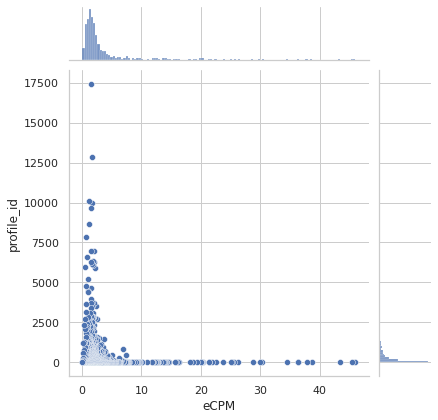

In [20]:
sns.jointplot(x="eCPM", y="profile_id", data=city_ecpm)
plt.show()

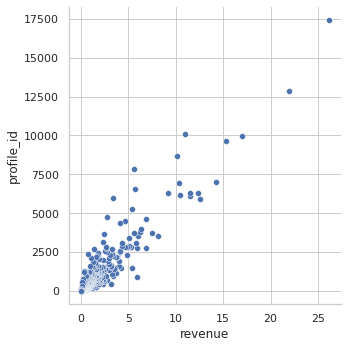

In [21]:
sns.relplot(x="revenue", y="profile_id", data=city_ecpm)
plt.show()

**Вывод** По первому графику видно, больше всего по количеству показывается реклама с eCPM от 0 до 5, и второй график показывает корреляциюколичества показов и прибыли. Наиболее интересный город Нью-Йорк

### Зависит ли eCPM от времени дня

In [22]:
# проведем анализ в разрезе часов
data['hour'] = data['event_datetime'].dt.hour

Наш датасет начинается с 2022-01-29 17:42:32. Для более правильного распределения возьмем данные за полный день

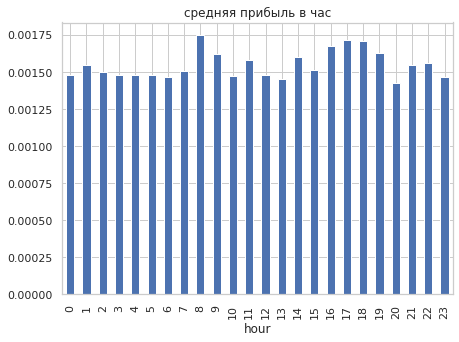

In [23]:
date = ''
data.query('event_datetime > "2022-01-30 00:00:00"').groupby('hour')['revenue'].mean().plot(grid=True, kind='bar', figsize=(7, 5))
plt.title('средняя прибыль в час')
plt.show()

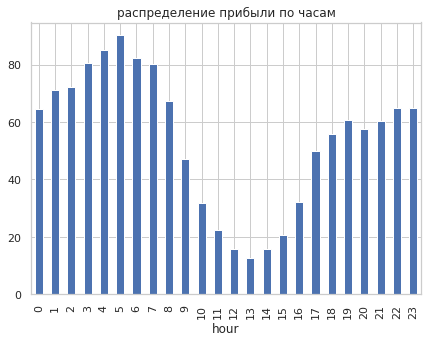

In [24]:
data.query('event_datetime > "2022-01-30 00:00:00"').groupby('hour')['revenue'].sum().plot(grid=True, kind='bar', figsize=(7, 5))
plt.title('распределение прибыли по часам')
plt.show()

**Вывод:** Среднее значение прибыли не зависит от времени суток, а вот по суммарной прибыли виден провал в районе 13-14 часов. Прежде чем делать вывод нужно разобраться в каком часовом поясе записываеся событие. Если в чаосвом поясе +- Москва, то тогда в том же Нью-Йорке ночь и картина становится более правдоподобна

## Вывод

В работе были проведены исследования по распределению доходов по юзерам, городам и версиям операционной системы. И дополнительное исследование зависимости eCPM от времени дня. На данный момент картина выглядит следующим образом
- проверено распределение revenue. Выявленно, что в показах присутствуют аномально дорогие показы
- установленно что нет прямой зависимости прибыли от показов и количества показов. Более того чаше показывают рекламу с eCPM до 5 долларов и именно она приносит максимальную выручку
- установленна прямая зависимость от количества показов или количества юзеров. Чем больше юзеров, тем больше выручка
- в промежутке с 10 до 16 происходит спад прибыли. Требуются дополнительная информация для прояснения ситуации